# $\underline{Рассмотрение\;альтернативных\;гипотез}$ 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import *
from math import *
import random
from IPython.display import display, Math
import pandas as pd
from time import time 
from NormalityTest import *
from statsmodels.stats.diagnostic import normal_ad

(array([ 99.,  91.,  86., 114., 104., 124.,  88.,  90., 112.,  92.]),
 array([2.22953832e-04, 9.99418993e-02, 1.99660845e-01, 2.99379790e-01,
        3.99098736e-01, 4.98817681e-01, 5.98536627e-01, 6.98255572e-01,
        7.97974518e-01, 8.97693463e-01, 9.97412409e-01]),
 <a list of 10 Patch objects>)

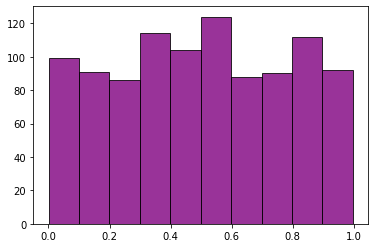

In [11]:
pval = []
for i in range(1000):
    pval.append(Sample(norm(0,1).rvs(size = 100)).sarkadi())
    
plt.hist(
    pval,
    align = 'mid', 
    alpha = 0.8, 
    edgecolor='k',
    color = 'purple'

)

In [5]:
t1 = time()

## Функция для для создания фрейма соотвествующих вероятностей события A
## A - {p_value < уровень значимости}
def SarhadiFrame(length):
    N = 1000
    ## Инициализация соотвествующих счетчиков
    k_expon = 0
    k_chi_3_2 = 0
    k_norm = 0
    k_cauch = 0
    ## Цикл для подсчета событий
    for iteration in range(N):
        ## Проверка p-value по критерию Саркади по выборке из экспоненциального распределения
        if Sample(expon(0.5).rvs(size = length)).sarkadi() <= 0.05:
            k_expon += 1
        ## Проверка p-value по критерию Саркади по выборке из хи-квадрат распределения
        if Sample(chi2(3).rvs(size = length)).sarkadi() <= 0.05:
            k_chi_3_2 += 1
        ## Проверка p-value по критерию Саркади по выборке из нормального распределения
        if Sample(norm(0,1).rvs(size = length)).sarkadi() <= 0.05:
            k_norm += 1
        ## Проверка p-value по критерию Саркади по выборке из распределения Коши
        if Sample(cauchy(0,1).rvs(size = length)).sarkadi() <= 0.05:
            k_cauch += 1
    
    ## Возвращение векторов вероятностей
    return [k_expon/N,k_chi_3_2/N,k_norm/N,k_cauch/N]

## Создание фрейма для хранения вероятностей
df = pd.DataFrame({
    'Распределение' : ['Показательное(0,5)','Хи-квадрат(3)','Нормальное(0;1)','Коши(0;1)']
})

## Заполнение фрейма
df['62'] = SarhadiFrame(62)
df['124'] = SarhadiFrame(124)
df['248'] = SarhadiFrame(248)
print('Время выполнения программы: ', time()-t1)
display(Math(r'Для\;проверки\;используются\;Exp(0,5),\;\chi^{2}(3),\;N(0;1),\;C(0;1)\;-\;распределения'))
display(Math(r'[62\;124\;248]\;-\;объёмы\;выборок\;соотвествующих\;распределений'))
display(df)



c:\users\вячеслав\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


Время выполнения программы:  20.49595618247986


<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Распределение,62,124,248
0,"Показательное(0,5)",1.000,1.000,1.000
1,Хи-квадрат(3),0.987,1.000,1.000
2,Нормальное(0;1),0.061,0.059,0.053
3,Коши(0;1),0.999,1.000,1.000
